In [1]:
!pip install xgboost


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [5]:

path=r"C:\Users\jcama\Downloads\OneDrive_2025-08-31\Curso 2 - Python Fundamentals for Machine Learning\OneDrive_2025-04-15\Materiales de clase- Python Fundamentasl for Machine Learning\weather_classification_data.csv"

In [ ]:
df=pd.read_csv(path)

In [7]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


<Axes: xlabel='Weather Type'>

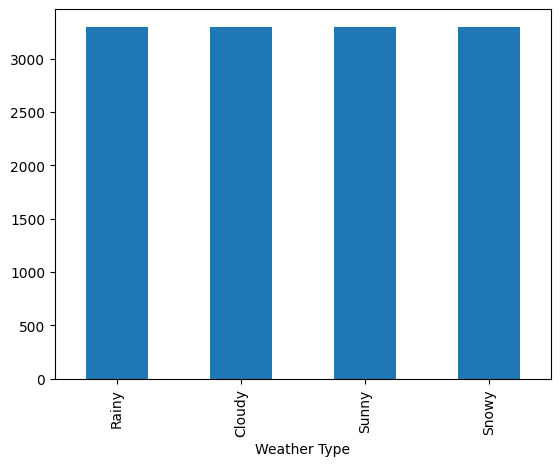

In [8]:
df['Weather Type'].value_counts().plot(kind='bar')

In [9]:
#df2=df.copy()

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el LabelEncoder a la columna deseada
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])

#df2['Weather codification'] = label_encoder.fit_transform(df2['Weather Type'])

In [10]:
#df2[['Weather Type'	,'Weather codification']].drop_duplicates()

In [11]:
#df[['Weather Type','Weather Type2']].drop_duplicates()

In [12]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [13]:
df['Weather Type'].value_counts()

Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64

In [14]:
for column in df.columns:
    print(column, df[column].nunique())

Temperature 126
Humidity 90
Wind Speed 97
Precipitation (%) 110
Cloud Cover 4
Atmospheric Pressure 5456
UV Index 15
Season 4
Visibility (km) 41
Location 3
Weather Type 4


In [15]:

def get_type(value):
    return type(value)

unique_values={}
dataset=df
for column in dataset.columns:
    num_unique = len(set(dataset[column]))
    percentage_unique = num_unique / dataset.shape[0]
    nan_values = dataset[column].isna().sum()
    nan_values_percentage= nan_values / dataset.shape[0]
    type_column = mode(map(get_type, set(dataset[column])))
    
    unique_values[column] = [num_unique, percentage_unique, nan_values, nan_values_percentage, type_column]
    
result_df = pd.DataFrame.from_dict(unique_values, orient='index', columns=['unique values', 'percentage', 'nan values count', 'nan values percentage', 'type'])
result_df


,unique values,percentage,nan values count,nan values percentage,type
Temperature,126,0.009545,0,0.0,<class 'float'>
Humidity,90,0.006818,0,0.0,<class 'int'>
Wind Speed,97,0.007348,0,0.0,<class 'float'>
Precipitation (%),110,0.008333,0,0.0,<class 'float'>
Cloud Cover,4,0.000303,0,0.0,<class 'str'>
Atmospheric Pressure,5456,0.413333,0,0.0,<class 'float'>
UV Index,15,0.001136,0,0.0,<class 'int'>
Season,4,0.000303,0,0.0,<class 'str'>
Visibility (km),41,0.003106,0,0.0,<class 'float'>
Location,3,0.000227,0,0.0,<class 'str'>


In [16]:

train_df, test_df = train_test_split(
    df, 
    test_size=0.3, 
    stratify=df['Weather Type'], 
    random_state=42
)


In [17]:
df.head(1).T

,0
Temperature,14.0
Humidity,73
Wind Speed,9.5
Precipitation (%),82.0
Cloud Cover,partly cloudy
Atmospheric Pressure,1010.82
UV Index,2
Season,Winter
Visibility (km),3.5
Location,inland


In [18]:
result_df.columns

Index(['unique values', 'percentage', 'nan values count',
       'nan values percentage', 'type'],
      dtype='object')

In [19]:
categorical_col=result_df[result_df.type==str].index

In [20]:
categorical_col=['Cloud Cover', 'Season', 'Location']

In [21]:
print(categorical_col)

['Cloud Cover', 'Season', 'Location']


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False , handle_unknown='ignore')

encoder.fit(train_df[categorical_col])
train_encoded = pd.DataFrame(encoder.transform(train_df[categorical_col]), columns=encoder.get_feature_names_out(categorical_col))
test_encoded = pd.DataFrame(encoder.transform(test_df[categorical_col]), columns=encoder.get_feature_names_out(categorical_col))

train_encoded_df = pd.concat([train_df.reset_index(drop=True), train_encoded], axis=1).drop(columns=categorical_col)
test_encoded_df = pd.concat([test_df.reset_index(drop=True), test_encoded], axis=1).drop(columns=categorical_col)


In [23]:
train_encoded_df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,11.0,68,3.5,31.0,902.53,8,9.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-2.0,99,31.5,89.0,991.12,4,0.5,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,28.0,67,3.0,11.0,1028.93,7,9.5,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,41,14.5,94.0,1147.75,11,1.0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,46.0,44,5.0,19.0,869.11,5,6.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,29.0,50,7.5,19.0,1012.87,9,6.5,3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9236,26.0,71,4.0,39.0,1011.13,4,6.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9237,34.0,49,8.5,2.0,1020.99,9,6.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9238,21.0,99,16.0,60.0,1011.58,2,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


<Axes: xlabel='Location'>

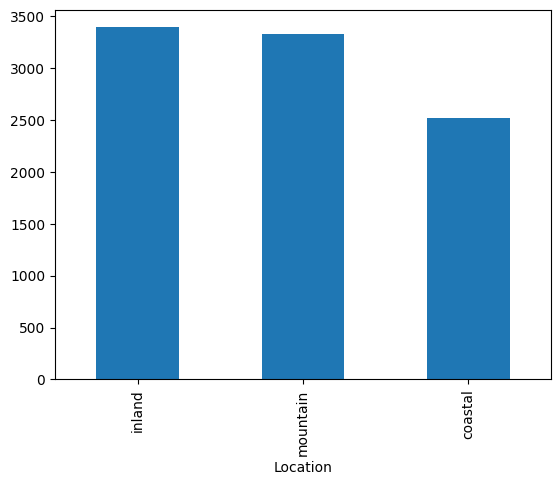

In [24]:
train_df['Location'].value_counts().plot(kind='bar')

In [25]:
train_encoded_df.isna().sum()

Temperature                  0
Humidity                     0
Wind Speed                   0
Precipitation (%)            0
Atmospheric Pressure         0
UV Index                     0
Visibility (km)              0
Weather Type                 0
Cloud Cover_cloudy           0
Cloud Cover_overcast         0
Cloud Cover_partly cloudy    0
Season_Spring                0
Season_Summer                0
Season_Winter                0
Location_inland              0
Location_mountain            0
dtype: int64

In [26]:
train_encoded_df.head(1).T

,0
Temperature,11.00
Humidity,68.00
Wind Speed,3.50
Precipitation (%),31.00
Atmospheric Pressure,902.53
UV Index,8.00
Visibility (km),9.00
Weather Type,0.00
Cloud Cover_cloudy,0.00
Cloud Cover_overcast,0.00


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train = train_encoded_df.drop('Weather Type', axis=1)
y_train = train_encoded_df['Weather Type']

X_test = test_encoded_df.drop('Weather Type', axis=1)
y_test = test_encoded_df['Weather Type']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to view the importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

Accuracy: 0.9108585858585858
                      Feature  Importance
0                 Temperature    0.184562
3           Precipitation (%)    0.153826
5                    UV Index    0.150257
6             Visibility (km)    0.142253
4        Atmospheric Pressure    0.135586
1                    Humidity    0.063219
12              Season_Winter    0.049070
2                  Wind Speed    0.037129
8        Cloud Cover_overcast    0.035894
9   Cloud Cover_partly cloudy    0.015033
10              Season_Spring    0.008466
11              Season_Summer    0.007545
7          Cloud Cover_cloudy    0.006335
13            Location_inland    0.006090
14          Location_mountain    0.004735


In [28]:
importance_df

,Feature,Importance
0,Temperature,0.184562
3,Precipitation (%),0.153826
5,UV Index,0.150257
6,Visibility (km),0.142253
4,Atmospheric Pressure,0.135586
1,Humidity,0.063219
12,Season_Winter,0.049070
2,Wind Speed,0.037129
8,Cloud Cover_overcast,0.035894
9,Cloud Cover_partly cloudy,0.015033


<Figure size 1200x800 with 0 Axes>

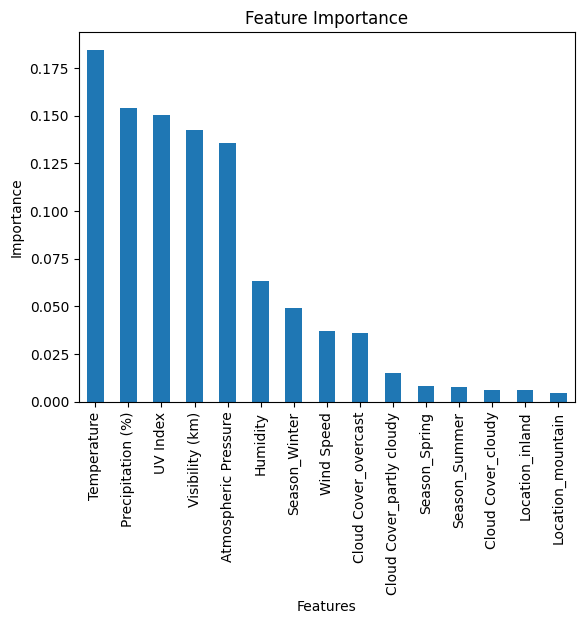

In [29]:
plt.figure(figsize=(12, 8))  # Width: 12 inches, Height: 8 inches

# Plot the bar chart
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)

# Add labels and title (optional)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Show the plot
plt.show()

<Axes: xlabel='Feature'>

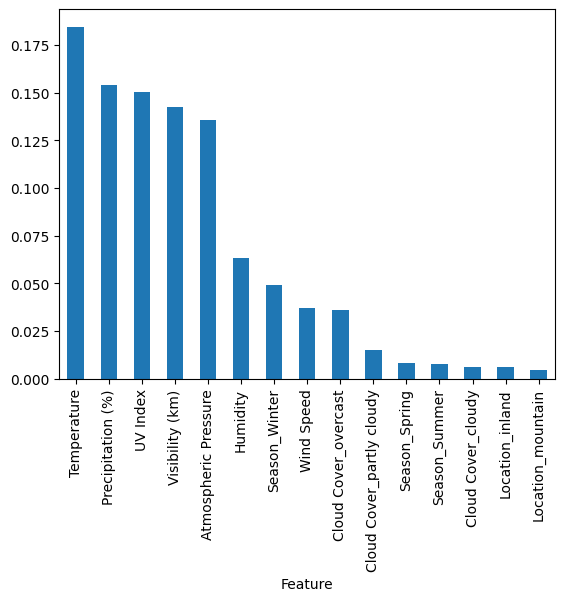

In [30]:
importance_df[importance_df['Importance']>0.002].sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', y='Importance', legend=False)

In [31]:
selected_features = importance_df[importance_df['Importance']>0.001]['Feature'].values

In [32]:
print(selected_features)

['Temperature' 'Precipitation (%)' 'UV Index' 'Visibility (km)'
 'Atmospheric Pressure' 'Humidity' 'Season_Winter' 'Wind Speed'
 'Cloud Cover_overcast' 'Cloud Cover_partly cloudy' 'Season_Spring'
 'Season_Summer' 'Cloud Cover_cloudy' 'Location_inland'
 'Location_mountain']


In [33]:
X_train = train_encoded_df.drop('Weather Type', axis=1)
y_train = train_encoded_df['Weather Type']

X_test = test_encoded_df.drop('Weather Type', axis=1)
y_test = test_encoded_df['Weather Type']

#X_train = X_train[selected_features]
#X_test = X_test[selected_features]

# KNN

In [34]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


knn = KNeighborsClassifier(
    n_neighbors=5,            
    metric='euclidean'         
)



knn.fit(X_train, y_train)



KNeighborsClassifier(metric='euclidean')

In [35]:
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [36]:
report = classification_report(y_test, y_pred)
print("Classification Report (Test Data):")
print(report)

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       990
           1       0.85      0.89      0.87       990
           2       0.95      0.92      0.93       990
           3       0.92      0.87      0.89       990

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960



In [37]:

report_train = classification_report(y_train, y_pred_train)
print("Classification Report (Train Data):")
print(report_train)


Classification Report (Train Data):
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2310
           1       0.89      0.94      0.91      2310
           2       0.96      0.95      0.95      2310
           3       0.95      0.90      0.93      2310

    accuracy                           0.92      9240
   macro avg       0.92      0.92      0.92      9240
weighted avg       0.92      0.92      0.92      9240



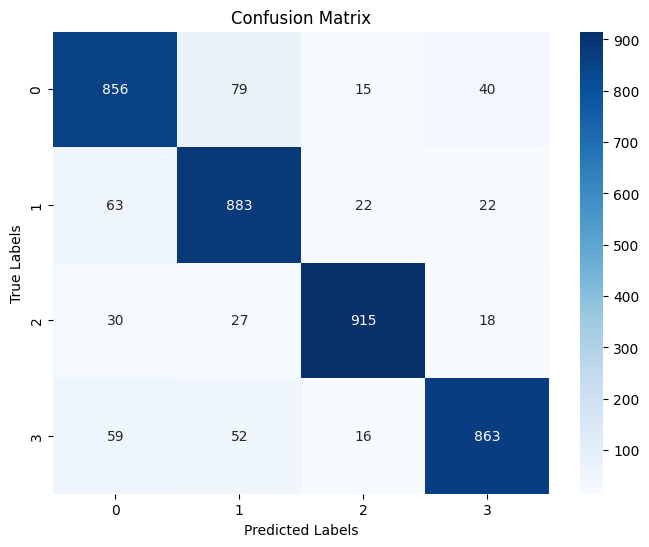

In [38]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test.values, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

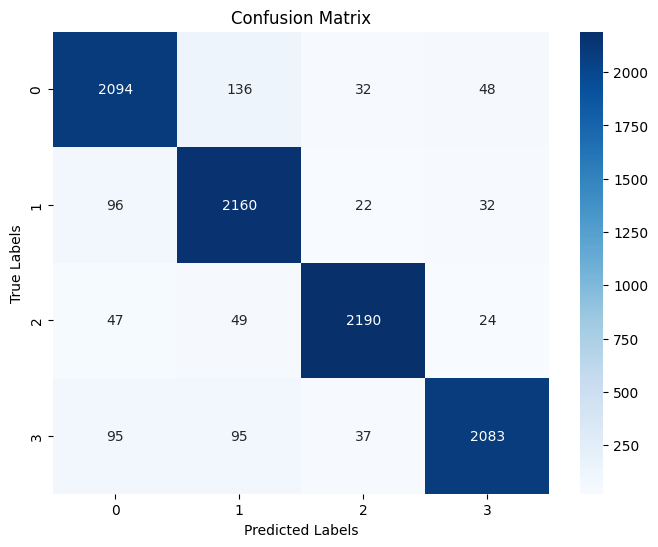

In [39]:
import seaborn as sns

conf_matrix = confusion_matrix(y_train.values, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Regression Logistica

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(
    class_weight='balanced',  
    max_iter=1000             
)


log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report (Test Set):")
print(report)

# Make predictions on the training set
y_pred_train = log_reg.predict(X_train)
report_train = classification_report(y_train, y_pred_train)

print("Classification Report (Training Set):")
print(report_train)

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       990
           1       0.81      0.81      0.81       990
           2       0.88      0.92      0.90       990
           3       0.87      0.83      0.85       990

    accuracy                           0.84      3960
   macro avg       0.84      0.84      0.84      3960
weighted avg       0.84      0.84      0.84      3960

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2310
           1       0.81      0.80      0.80      2310
           2       0.88      0.93      0.91      2310
           3       0.88      0.85      0.86      2310

    accuracy                           0.84      9240
   macro avg       0.84      0.84      0.84      9240
weighted avg       0.84      0.84      0.84      9240



c:\Users\jcama\miniconda3\envs\interbank\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


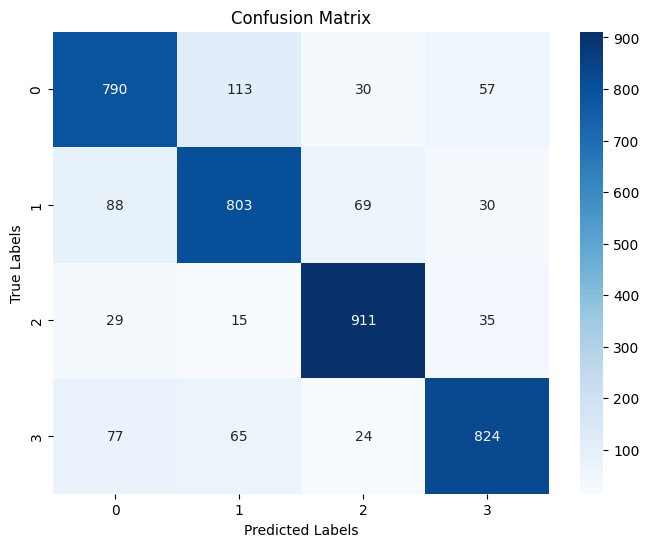

In [41]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test.values, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

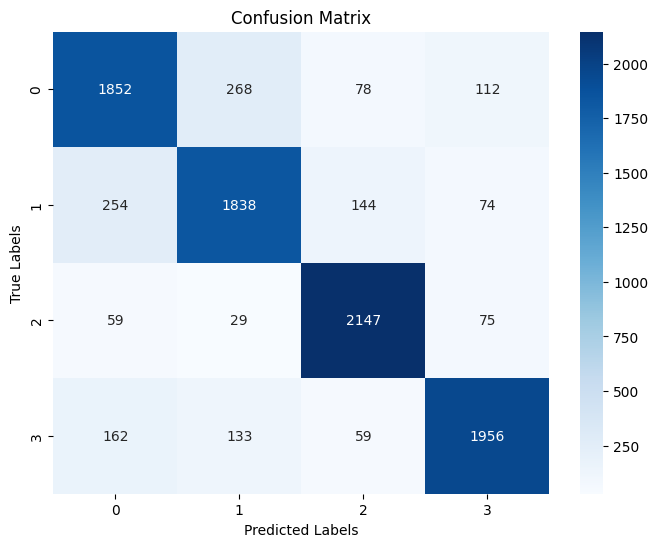

In [42]:
import seaborn as sns

conf_matrix = confusion_matrix(y_train.values, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
betas = log_reg.coef_[0]
betas_df = pd.DataFrame(betas, index=X_train.columns, columns=["Beta"])
print("Coefficients (Betas):")
print(betas_df)

Coefficients (Betas):
                               Beta
Temperature                0.025864
Humidity                   0.012787
Wind Speed                -0.010949
Precipitation (%)         -0.020201
Atmospheric Pressure      -0.000375
UV Index                  -0.034664
Visibility (km)            0.138717
Cloud Cover_cloudy        -0.084799
Cloud Cover_overcast       0.281299
Cloud Cover_partly cloudy  1.206027
Season_Spring              0.089686
Season_Summer             -0.027439
Season_Winter             -0.158034
Location_inland           -0.027686
Location_mountain         -0.067508


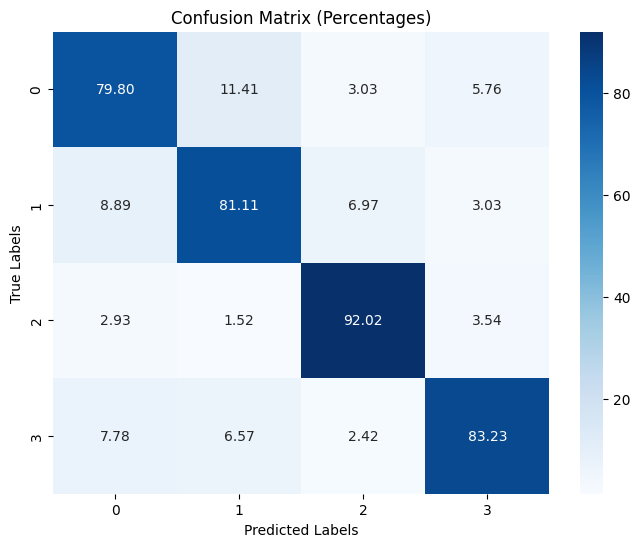

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_test.values, y_pred)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest Classifier with hyperparameters
rf = RandomForestClassifier(
    n_estimators=80,       
    max_depth=6,           
    class_weight='balanced',  

)


rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)


print("Classification Report (Test Set):")
print(report)


y_pred_train = rf.predict(X_train)
report_train = classification_report(y_train, y_pred_train)

print("Classification Report (Training Set):")
print(report_train)


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       990
           1       0.87      0.92      0.90       990
           2       0.98      0.90      0.94       990
           3       0.93      0.91      0.92       990

    accuracy                           0.90      3960
   macro avg       0.91      0.90      0.90      3960
weighted avg       0.91      0.90      0.90      3960

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2310
           1       0.90      0.95      0.93      2310
           2       0.99      0.93      0.96      2310
           3       0.94      0.94      0.94      2310

    accuracy                           0.93      9240
   macro avg       0.93      0.93      0.93      9240
weighted avg       0.93      0.93      0.93      9240



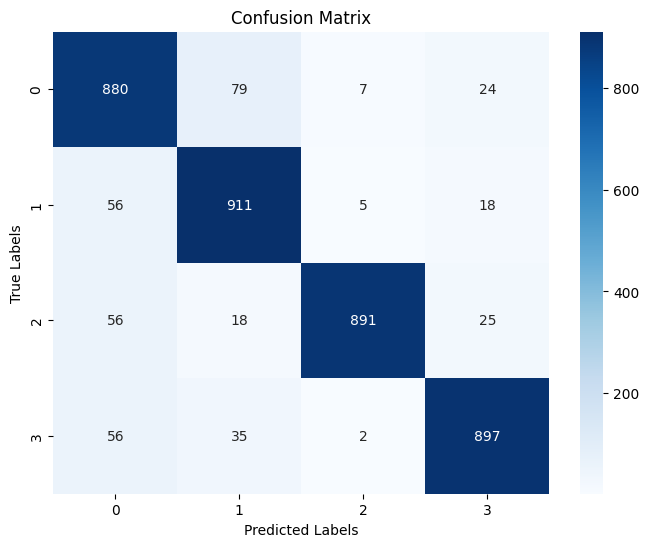

In [46]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test.values, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

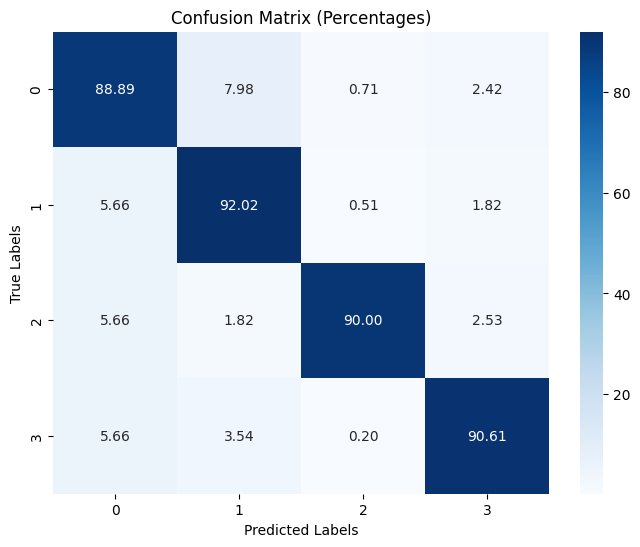

In [47]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test.values, y_pred)

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


# Arbol de decision

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier(criterion='gini', max_depth=10, 
                            min_samples_split=2, min_samples_leaf=4)


dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


report = classification_report(y_test, y_pred)
print("Test Data Classification Report:\n", report)


y_pred_train = dt.predict(X_train)

report_train = classification_report(y_train, y_pred_train)
print("Train Data Classification Report:\n", report_train)


Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       990
           1       0.91      0.89      0.90       990
           2       0.92      0.92      0.92       990
           3       0.93      0.91      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Train Data Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2310
           1       0.96      0.94      0.95      2310
           2       0.94      0.97      0.96      2310
           3       0.96      0.94      0.95      2310

    accuracy                           0.95      9240
   macro avg       0.95      0.95      0.95      9240
weighted avg       0.95      0.95      0.95      9240



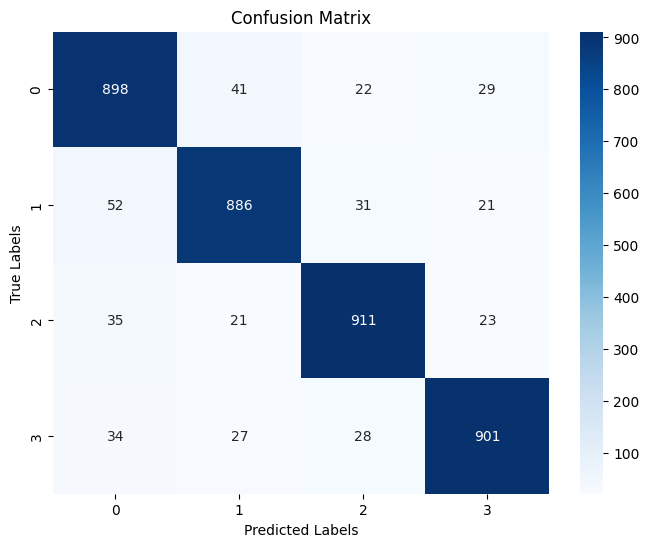

In [49]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test.values, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

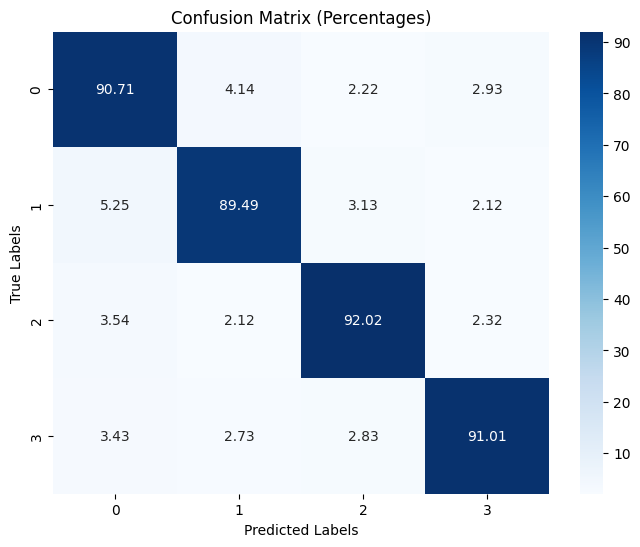

In [50]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_test.values, y_pred)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


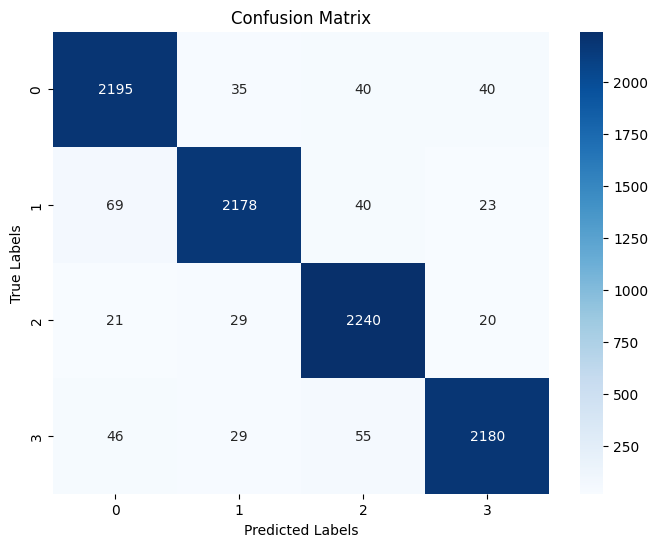

In [51]:
import seaborn as sns

conf_matrix = confusion_matrix(y_train.values, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

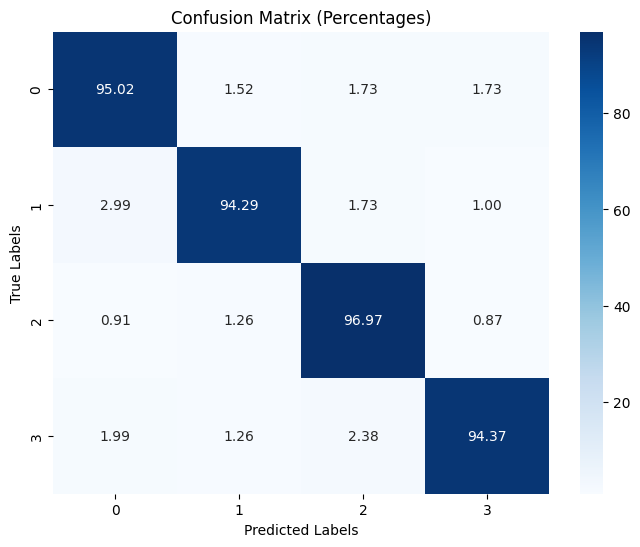

In [52]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_train.values, y_pred_train)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


# Hyperparametrization

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier()


param_grid = {
    'criterion': ['entropy'],          
    'max_depth': [None, 10, 20, 30, 40, 50],   
    'min_samples_split': [2, 10, 20],          
    'min_samples_leaf': [1, 5, 10],                            
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print(best_dt)

y_pred = best_dt.predict(X_test)
y_pred_train = best_dt.predict(X_train)


print("Test Data Classification Report:\n", classification_report(y_test, y_pred))
print("Train Data Classification Report:\n", classification_report(y_train, y_pred_train))


print("Best Parameters from GridSearchCV:\n", grid_search.best_params_)
print("Best Cross-validation Accuracy Score from GridSearchCV:\n", grid_search.best_score_)


Fitting 10 folds for each of 54 candidates, totalling 540 fits
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=10)
Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       990
           1       0.91      0.90      0.91       990
           2       0.93      0.92      0.93       990
           3       0.93      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Train Data Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2310
           1       0.96      0.95      0.96      2310
           2       0.97      0.97      0.97      2310
           3       0.97      0.95      0.96      2310

    accuracy                          

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rf = RandomForestClassifier(
    n_estimators=80,       
    max_depth=5,           
    class_weight='balanced',  

)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)


print("Classification Report (Test Set):")
print(report)


y_pred_train = rf.predict(X_train)
report_train = classification_report(y_train, y_pred_train)

print("Classification Report (Training Set):")
print(report_train)


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       990
           1       0.87      0.92      0.90       990
           2       0.98      0.90      0.94       990
           3       0.89      0.91      0.90       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2310
           1       0.89      0.93      0.91      2310
           2       0.99      0.92      0.95      2310
           3       0.89      0.92      0.91      2310

    accuracy                           0.92      9240
   macro avg       0.92      0.92      0.92      9240
weighted avg       0.92      0.92      0.92      9240



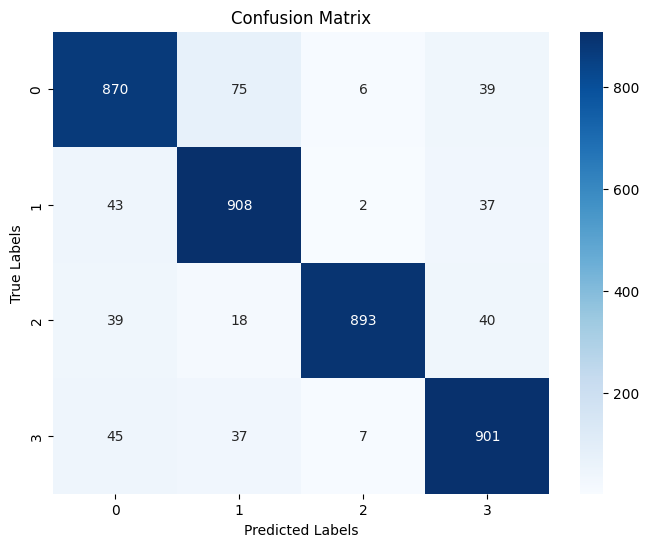

In [55]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test.values, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

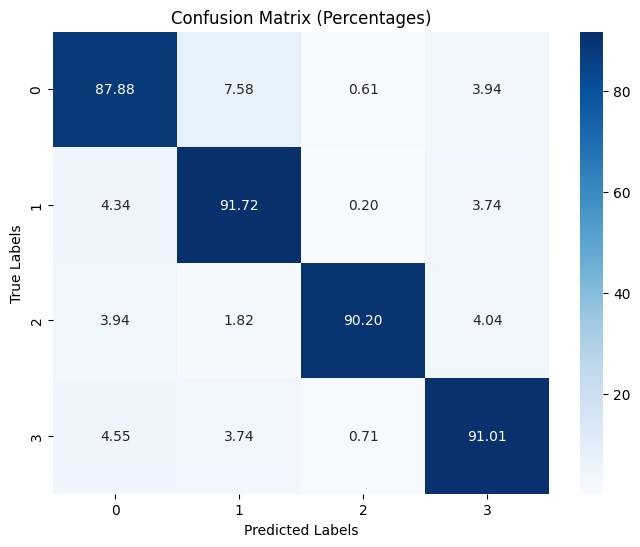

In [56]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_test.values, y_pred)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


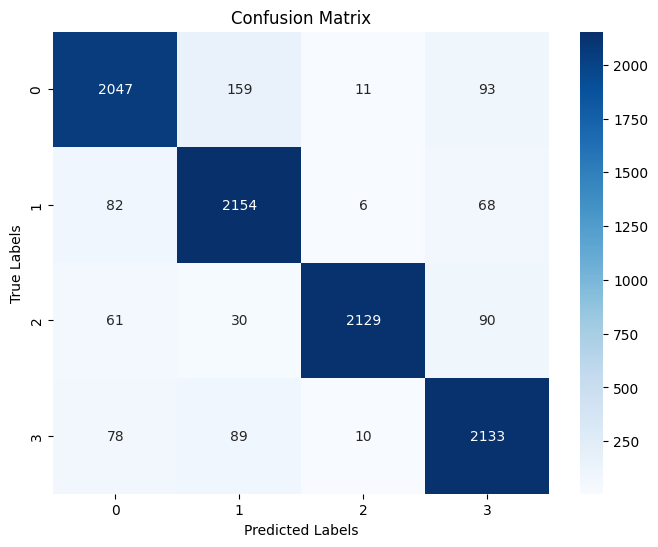

In [57]:
import seaborn as sns

conf_matrix = confusion_matrix(y_train.values, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

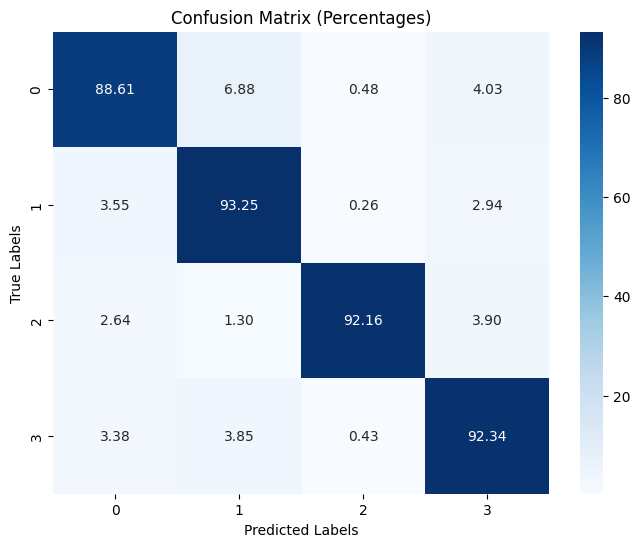

In [58]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_train.values, y_pred_train)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


In [59]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 80, 100, 150],          # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')


grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)


print("Classification Report (Test Set):\n", classification_report(y_test, y_pred))
print("Classification Report (Training Set):\n", classification_report(y_train, y_pred_train))


print("Best Parameters from GridSearchCV:\n", grid_search.best_params_)
print("Best Cross-validation Accuracy Score from GridSearchCV:\n", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       990
           1       0.91      0.91      0.91       990
           2       0.96      0.91      0.93       990
           3       0.93      0.91      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2310
           2       1.00      1.00      1.00      2310
           3       1.00      1.00      1.00      2310

    accuracy                           1.00      9240
   macro avg       1.00      1.00      1.00      9240
weighted avg       1.00      1.00      1.00     

# XGBoost

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


xgb = XGBClassifier(
    n_estimators=80,       
    max_depth=5,           
    scale_pos_weight=1,    
)


xgb.fit(X_train, y_train)


y_pred = xgb.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report (Test Set):")
print(report)


y_pred_train = xgb.predict(X_train)
report_train = classification_report(y_train, y_pred_train)

print("Classification Report (Training Set):")
print(report_train)


c:\Users\jcama\miniconda3\envs\interbank\lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       990
           1       0.91      0.91      0.91       990
           2       0.95      0.92      0.93       990
           3       0.92      0.92      0.92       990

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2310
           2       1.00      1.00      1.00      2310
           3       1.00      1.00      1.00      2310

    accuracy                           1.00      9240
   macro avg       1.00      1.00      1.00      9240
weighted avg       1.00      1.00      1.00      9240



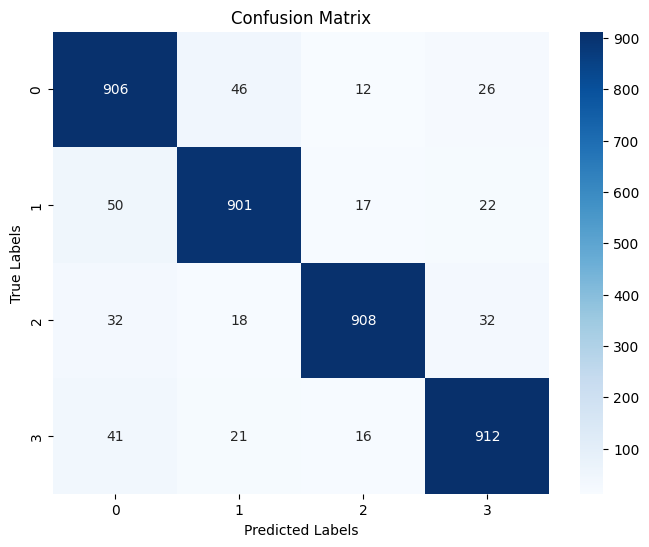

In [61]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test.values, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

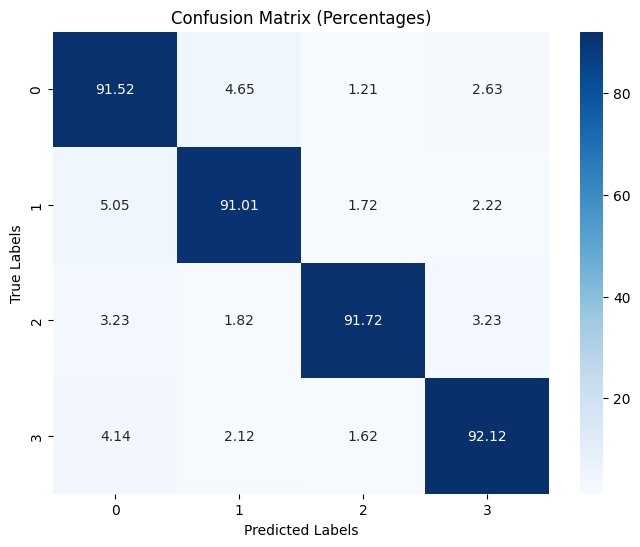

In [62]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_test.values, y_pred)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


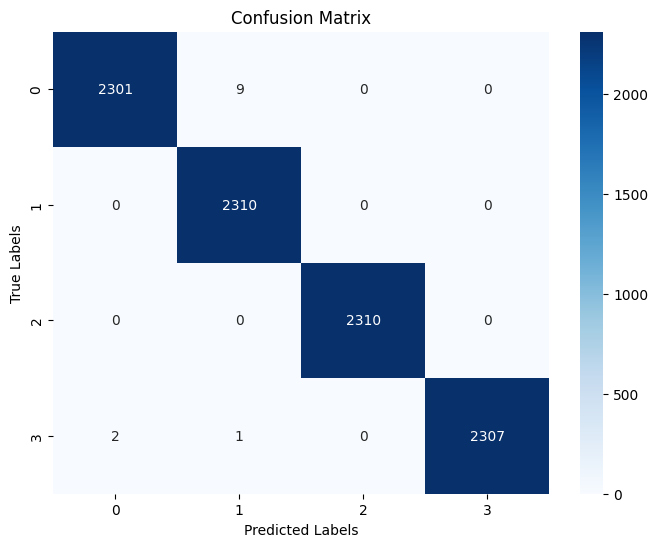

In [63]:
import seaborn as sns

conf_matrix = confusion_matrix(y_train.values, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

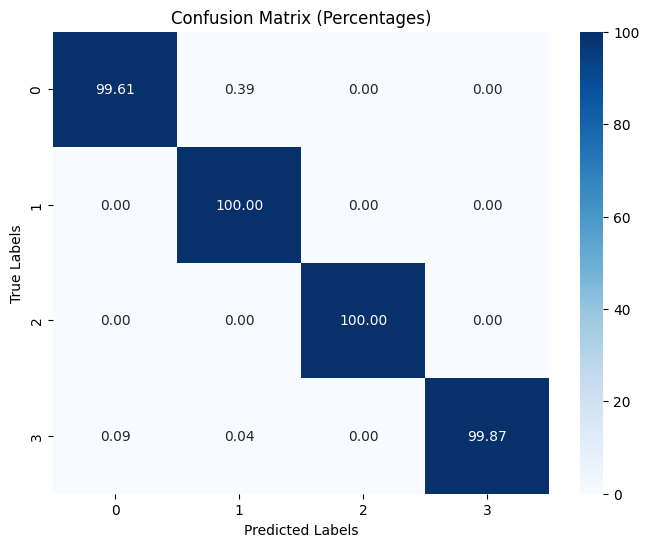

In [64]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_train.values, y_pred_train)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

xgb = XGBClassifier()


param_grid = {
    'n_estimators': [50, 80, 100, 150],           # Number of trees in the forest
    'max_depth': [3, 5, 7, 10],                   # Maximum depth of trees
    'scale_pos_weight': [1],  
    'subsample': [0.6, 0.8, 1.0],                 #  indicates that the model will be tested with 60%, 80%, and 100% of the data for training each tree. 
    'colsample_bytree': [0.6, 0.8, 1.0],          # means that the model will use 60%, 80%, and 100% of the features for each tree.
              
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)


best_xgb = grid_search.best_estimator_


y_pred = best_xgb.predict(X_test)
y_pred_train = best_xgb.predict(X_train)


print("Classification Report (Test Set):\n", classification_report(y_test, y_pred))
print("Classification Report (Training Set):\n", classification_report(y_train, y_pred_train))


print("Best Parameters from GridSearchCV:\n", grid_search.best_params_)
print("Best Cross-validation Accuracy Score from GridSearchCV:\n", grid_search.best_score_)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


c:\Users\jcama\miniconda3\envs\interbank\lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       990
           1       0.90      0.91      0.91       990
           2       0.94      0.92      0.93       990
           3       0.92      0.92      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2310
           2       1.00      1.00      1.00      2310
           3       1.00      1.00      1.00      2310

    accuracy                           1.00      9240
   macro avg       1.00      1.00      1.00      9240
weighted avg       1.00      1.00      1.00      9240

Best Parameters from GridSearchCV:
 {'colsample_bytree':

# Support Vector Machine

In [68]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report


svm = SVC(
    kernel='linear',       
    class_weight='balanced' 
)


svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report (Test Set):")
print(report)


y_pred_train = svm.predict(X_train)
report_train = classification_report(y_train, y_pred_train)

print("Classification Report (Training Set):")
print(report_train)



Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       990
           1       0.87      0.86      0.87       990
           2       0.88      0.93      0.90       990
           3       0.90      0.89      0.90       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2310
           1       0.87      0.86      0.87      2310
           2       0.89      0.93      0.91      2310
           3       0.90      0.91      0.90      2310

    accuracy                           0.89      9240
   macro avg       0.89      0.89      0.89      9240
weighted avg       0.89      0.89      0.89      9240



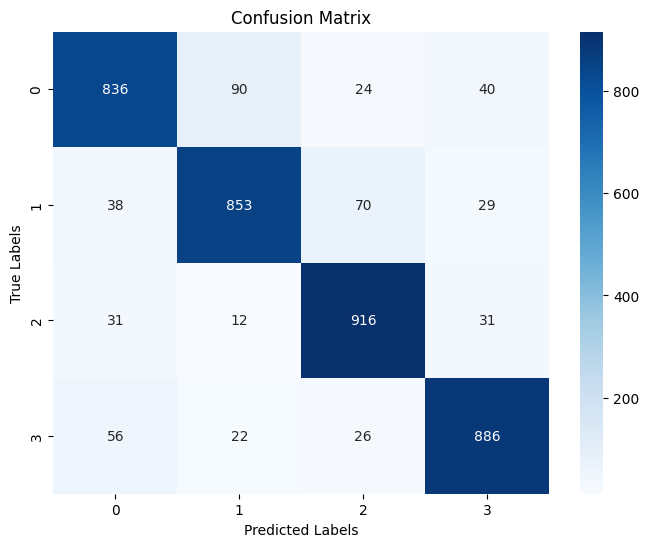

In [69]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test.values, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

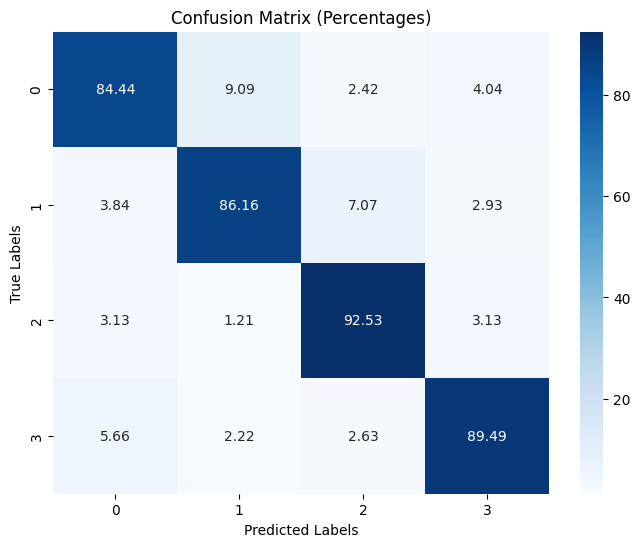

In [70]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_test.values, y_pred)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


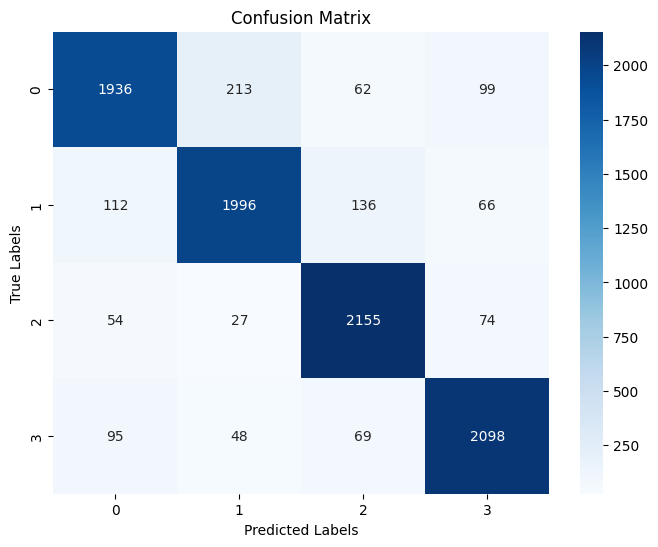

In [71]:
import seaborn as sns

conf_matrix = confusion_matrix(y_train.values, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

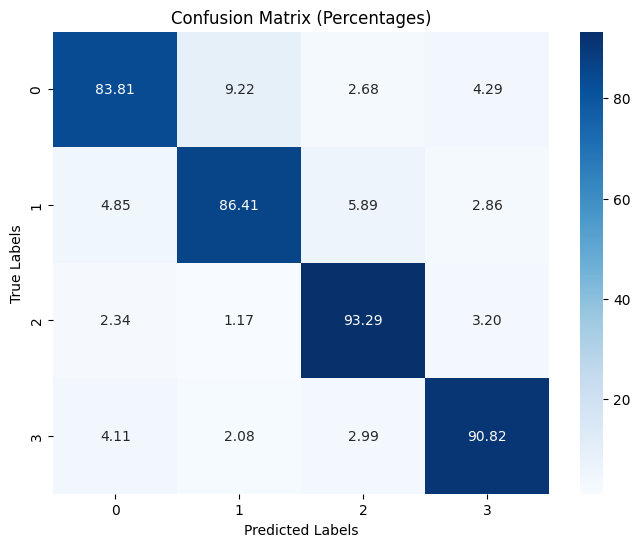

In [72]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_train.values, y_pred_train)


conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the SVC
svm = SVC()


param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'class_weight': ['balanced', None]    # Handling class imbalance
}


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, scoring='accuracy') # -1 use CPU to accelerate training


grid_search.fit(X_train, y_train)


best_svm = grid_search.best_estimator_


y_pred = best_svm.predict(X_test)
y_pred_train = best_svm.predict(X_train)


print("Classification Report (Test Set):\n", classification_report(y_test, y_pred))
print("Classification Report (Training Set):\n", classification_report(y_train, y_pred_train))


print("Best Parameters from GridSearchCV:\n", grid_search.best_params_)
print("Best Cross-validation Accuracy Score from GridSearchCV:\n", grid_search.best_score_)
